# Feature Engineering 

Feature Engineering is the process of transforming raw data into meaningful features that can be used as input for advanceced visualisations or machine learning algorithms.

It involves selecting, creating, and transforming features to hopefully enhance the dataset.

Poorly designed features can lead to a disruptive dataset. 


## Types of Feature Engineering

* **Handling Missing Values**

    Filling missing values with appropriate strategies, e.g., mean, median, or constant values.

* **Encoding Categorical Variables**

    Converting categorical data into numeric form, such as one-hot encoding or label encoding. Only needed if you are building a model

* **Binning Numeric Variables**

    Grouping continuous data into bins or categories to simplify the representation.

* **Feature Scaling**

    Scaling features to bring them to a similar range, e.g., Min-Max scaling or Standard scaling.

* **Creating New Features**

    Generating new features by combining or transforming existing ones.

* **Handling Outliers**

    Managing extreme values that can affect model performance.

* **Feature Joining**

    Creating new features by combining multiple existing features.

## Imports and Dataset

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, TruncatedSVD

import seaborn as sns



In [6]:
df = pd.read_excel("./data/insurance_claims_raw.xlsx")

In [25]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


### Missing Values

In [7]:
null_counts = df.isnull().sum()
null_counts

months_as_customer                0
age                               2
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 2
policy_annual_premium             3
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           1
insured_occupation                0
insured_hobbies                   2
insured_relationship              0
capital-gains                     2
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            93
incident_state                    2
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
df_new = df.drop("_c39", axis = 1)

In [9]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,2,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,0,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,2,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N


### Binding Numeric Data

In [10]:
df_new.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_date,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,998.000000,1000.000000,1000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000
mean,203.954000,38.962926,546238.648000,2002-02-08 04:40:47.999999872,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,2015-01-30 08:02:24,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000
min,0.000000,19.000000,100804.000000,1990-01-08 00:00:00,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,2015-01-01 00:00:00,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,1995-09-19 00:00:00,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,2015-01-15 00:00:00,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,2002-04-01 12:00:00,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,2015-01-31 00:00:00,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2008-04-21 12:00:00,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,2015-02-15 00:00:00,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2015-02-22 00:00:00,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,2015-03-01 00:00:00,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000
std,115.113174,9.135425,257063.005276,NaN,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,NaN,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861


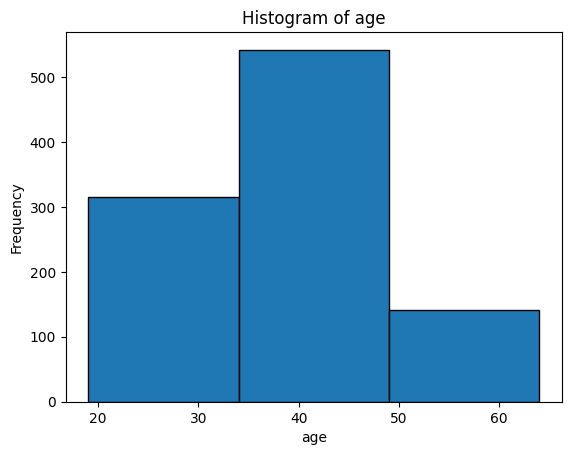

In [11]:
# Choose the column for the histogram
column_name = 'age'

# Plot the histogram
plt.hist(df[column_name], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display the histogram
plt.show()

In [12]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['ages_category'] = pd.cut(df_new['age'], bins=bin_edges, labels=bin_labels)

In [13]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged


In [14]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df_new['customer_category'] = pd.cut(df_new['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

In [15]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


## Creating New Features

In [16]:
df_new["Contract Years"] = df_new["months_as_customer"]/12

In [17]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,6510.0,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,7700.0,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,1300.0,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000


## Feature Joining

In [20]:
df_new['total_premiums_paid'] = (df_new['policy_annual_premium']/12) * df_new['months_as_customer']

In [21]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,13020.0,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,780.0,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,3850.0,23100,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,6340.0,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,650.0,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000


In [22]:
df_new['net_value_of_customer'] = df_new['total_premiums_paid'] - df_new['total_claim_amount']

In [80]:
df_new.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,claims_to_premium_ratio
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,1.862150
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,0.222885
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,2.195809
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client,21.333333,30202.453333,-33197.546667,2.099167
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,Accura,RSX,2009,N,Middle Aged,Long-Term Client,19.000000,30094.290000,23594.290000,0.215988


## Saving the csv for late

In [25]:
df_new.to_csv('./data/insurance_claims_processed.csv')

## Go wild

Go out a see what other features you can create that will be useful for our visualisations

In [81]:
df_new['claims_to_premium_ratio'] = df_new['total_claim_amount'] / df_new['total_premiums_paid']

In [83]:
df_clean = df_new.copy()

# Drop NaN values
df_clean = df_clean.dropna().reset_index(drop=True)

# Drop fraud_reported which is my target variable and define target variable
X= df_clean.drop(['fraud_reported', 'policy_number'], axis=1)
y = df_clean['fraud_reported'].map({'Y': 1, 'N': 0})

df_clean.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category,Contract Years,total_premiums_paid,net_value_of_customer,claims_to_premium_ratio
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,Saab,92x,2004,Y,Middle Aged,Long-Term Client,27.333333,38455.540000,-33154.460000,1.862150
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client,19.000000,22747.180000,17677.180000,0.222885
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,Dodge,RAM,2007,N,Young Adult,Established Client,11.166667,15780.063333,-18869.936667,2.195809
3,256,39.0,104594,2006-10-12,OH,250/500,1000.0,1351.10,0,478456,...,Saab,95,2003,Y,Middle Aged,Long-Term Client,21.333333,28823.466667,-35276.533333,2.223882
4,165,37.0,429027,1990-02-03,IL,100/300,1000.0,1137.03,0,603195,...,Audi,A5,2015,N,Middle Aged,Long-Term Client,13.750000,15634.162500,-35955.837500,3.299825


In [77]:
# Explicitly convert dates already converted to numerical format to int if not already
X['policy_bind_date'] = X['policy_bind_date'].astype('int64')
X['incident_date'] = X['incident_date'].astype('int64')

# Handling categorical df_clean with one-hot encoding
categorical_features = ['policy_state', 'policy_csl', 'incident_type', 'collision_type', 'incident_severity', 
                        'authorities_contacted', 'incident_state', 'incident_city', 'insured_sex', 
                        'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 
                        'auto_make', 'auto_model']

X[categorical_features] = X[categorical_features].astype(str)

# Continuous features to scale
continuous_features = ['months_as_customer', 'age', 'policy_bind_date', 'policy_deductable', 
                       'policy_annual_premium', 'umbrella_limit', 'incident_date', 'total_claim_amount', 
                       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

X[continuous_features] = X[continuous_features].apply(pd.to_numeric, errors='coerce')

# Create a column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and the logistic regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the predictions using a confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [50]:
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear')
}

In [51]:
def run_models(X_train, X_test, y_train, y_test, classifiers):
    results = {}
    for key, classifier in classifiers.items():
        # Create a pipeline with preprocessing and the current classifier
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', classifier)
        ])
        
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = pipeline.predict(X_test)
        
        # Evaluate the predictions and store results
        results[key] = {
            'confusion_matrix': confusion_matrix(y_test, y_pred),
            'classification_report': classification_report(y_test, y_pred, output_dict=True)
        }
        
        # Print the results for current classifier
        print(f"Results for {key}:")
        print("Confusion Matrix:")
        print(results[key]['confusion_matrix'])
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("-" * 60)
    
    return results


In [52]:
# Assuming your data is already split and preprocessed correctly
results = run_models(X_train, X_test, y_train, y_test, classifiers)


Results for Logistic Regression:
Confusion Matrix:
[[118  14]
 [ 24  22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       132
           1       0.61      0.48      0.54        46

    accuracy                           0.79       178
   macro avg       0.72      0.69      0.70       178
weighted avg       0.77      0.79      0.78       178

------------------------------------------------------------
Results for Random Forest:
Confusion Matrix:
[[121  11]
 [ 28  18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       132
           1       0.62      0.39      0.48        46

    accuracy                           0.78       178
   macro avg       0.72      0.65      0.67       178
weighted avg       0.76      0.78      0.76       178

------------------------------------------------------------
Results for Gradient Boosting:
Con

In [55]:

param_grid = {
    'classifier__C': [0.1, 1, 10, 100],  # Example values, adjust based on initial model performance
    'classifier__kernel': ['linear', 'rbf', 'poly'],
    'classifier__gamma': ['scale', 'auto'],  # 'scale' is 1 / (n_features * X.var()) as default
    'classifier__degree': [2, 3, 4]  # Only used if kernel is 'poly'
}

# Ensure the SVM pipeline step is named 'classifier' as below, or adjust the prefix in param_grid keys accordingly
svm_model = SVC()
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', svm_model)
])

grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5, verbose=2)  # cv is the number of folds

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__degree=2, classifier__gamma=scale, classifier__kernel=rbf

In [84]:
# Explicitly convert dates already converted to numerical format to int if not already
X['policy_bind_date'] = X['policy_bind_date'].astype('int64')
X['incident_date'] = X['incident_date'].astype('int64')

# Handling categorical df_clean with one-hot encoding
categorical_features = ['policy_state', 'policy_csl', 'incident_type', 'collision_type', 'incident_severity', 
                        'authorities_contacted', 'incident_state', 'incident_city', 'insured_sex', 
                        'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 
                        'auto_make', 'auto_model']

X[categorical_features] = X[categorical_features].astype(str)

# Continuous features to scale
continuous_features = ['months_as_customer', 'age', 'policy_bind_date', 'policy_deductable', 
                       'policy_annual_premium', 'umbrella_limit', 'incident_date', 'total_claim_amount', 
                       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']

X[continuous_features] = X[continuous_features].apply(pd.to_numeric, errors='coerce')

# Create a column transformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply preprocessing
X_prepared = preprocessor.fit_transform(X)

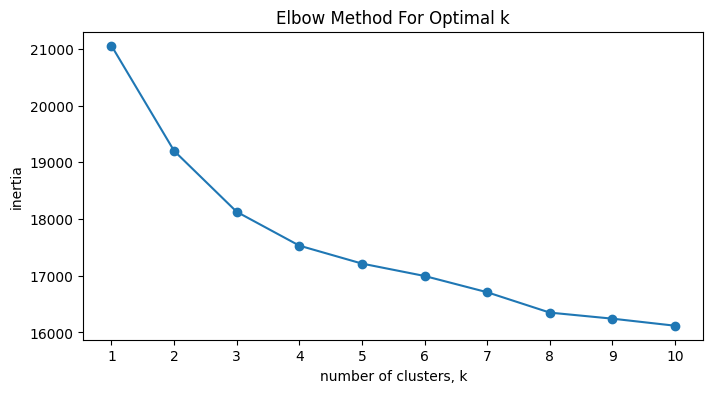

In [85]:
inertias = []
ks = range(1, 11)  # Test 1 to 10 clusters

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X_prepared)
    inertias.append(model.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.title('Elbow Method For Optimal k')
plt.show()

# Applying optimal number of clusters from the plot, say it's 4
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_prepared)  # Fit and predict in one step

# Add cluster labels back to the cleaned DataFrame
df_clean['cluster'] = clusters


(array([232., 335.,  92., 230.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

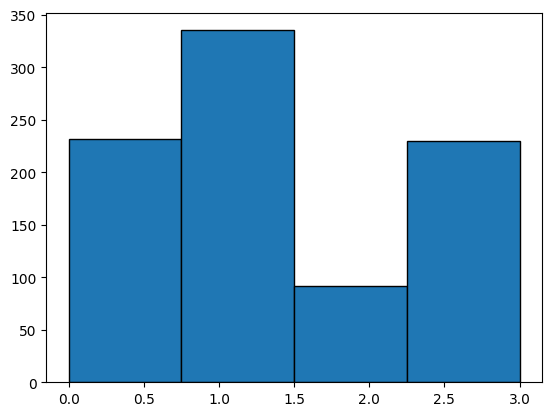

In [88]:
# Plot the histogram of clusters
plt.hist(df_clean['cluster'], bins=4, edgecolor='black')



In [94]:
# Print unique values in the 'fraud_reported' column
print(df_clean['fraud_reported'].unique())



['Y' 'N']


['Fraudulent' 'Non-Fraudulent']


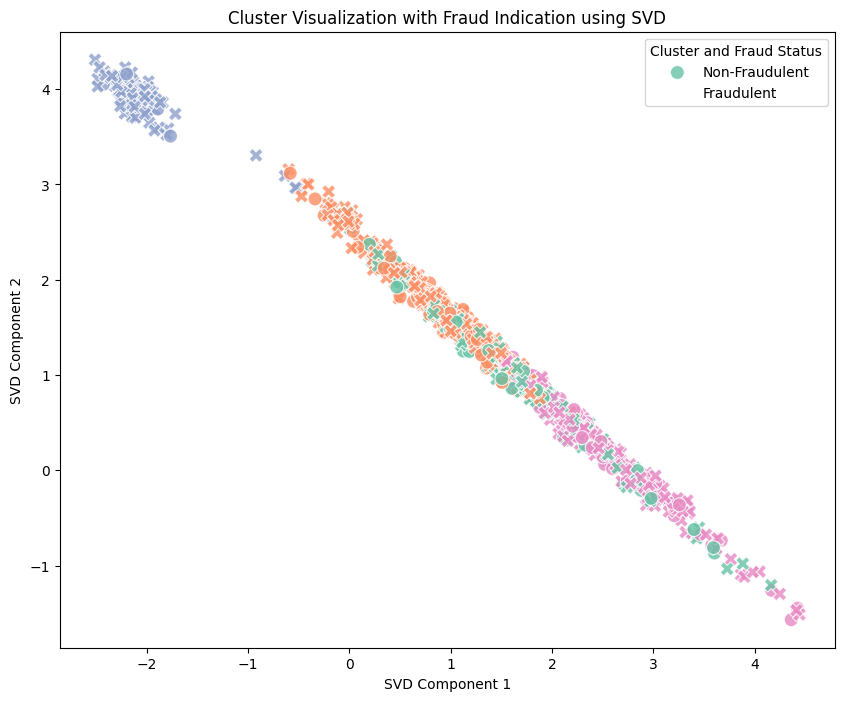

In [95]:
# Adjust the mapping to match 'Y' and 'N'
df_clean['fraud_reported_mapped'] = df_clean['fraud_reported'].map({'Y': 'Fraudulent', 'N': 'Non-Fraudulent'})

# Verify the new mapping
print(df_clean['fraud_reported_mapped'].unique())


# Apply TruncatedSVD
svd = TruncatedSVD(n_components=2)  # Reduce to two dimensions
X_svd = svd.fit_transform(X_prepared)

# Add SVD components to df_clean for plotting
df_clean['svd_one'] = X_svd[:, 0]
df_clean['svd_two'] = X_svd[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='svd_one', 
    y='svd_two', 
    hue='cluster',  # Color by cluster
    style=df_clean['fraud_reported_mapped'],  # Style by fraud status
    data=df_clean, 
    palette='Set2', 
    markers=['o', 'X'],  # Different markers for Non-Fraudulent and Fraudulent
    s=100, 
    alpha=0.8
)
plt.title('Cluster Visualization with Fraud Indication using SVD')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.legend(title='Cluster and Fraud Status', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()